# Aggregate Output

Aggergate output of OSKM endogenous/exogenous quantification and save output.

In [14]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(scattermore)
library(scales)

In [1]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

In [3]:
rna = readRDS("../20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

In [5]:
OCT4_bc_endo_exo_counts = data.frame(bc=c(), exo_cts=c(), endo_cts=c())

for (i in seq(length(DAYS))) {
    cur = read.table(sprintf("./out/OCT4/%s.quant", DAYS[i]), sep='\t', header=T)
    cur$bc = paste(cur$bc, i, sep='-')
    
    OCT4_bc_endo_exo_counts = rbind(OCT4_bc_endo_exo_counts, cur)   
}

In [6]:
SOX2_bc_endo_exo_counts = data.frame(bc=c(), exo_cts=c(), endo_cts=c())

for (i in seq(length(DAYS))) {
    cur = read.table(sprintf("./out/SOX2/%s.quant", DAYS[i]), sep='\t', header=T)
    cur$bc = paste(cur$bc, i, sep='-')
    
    SOX2_bc_endo_exo_counts = rbind(SOX2_bc_endo_exo_counts, cur)   
}

In [7]:
KLF4_bc_endo_exo_counts = data.frame(bc=c(), exo_cts=c(), endo_cts=c())

for (i in seq(length(DAYS))) {
    cur = read.table(sprintf("./out/KLF4/%s.quant", DAYS[i]), sep='\t', header=T)
    cur$bc = paste(cur$bc, i, sep='-')
    
    KLF4_bc_endo_exo_counts = rbind(KLF4_bc_endo_exo_counts, cur)   
}

In [8]:
MYC_bc_endo_exo_counts = data.frame(bc=c(), exo_cts=c(), endo_cts=c())

for (i in seq(length(DAYS))) {
    cur = read.table(sprintf("./out/MYC/%s.quant", DAYS[i]), sep='\t', header=T)
    cur$bc = paste(cur$bc, i, sep='-')
    
    MYC_bc_endo_exo_counts = rbind(MYC_bc_endo_exo_counts, cur)   
}

In [13]:
# subset of all barcodes
dim(OCT4_bc_endo_exo_counts)

[1] 39446     4

In [10]:
head(OCT4_bc_endo_exo_counts)

,X,bc,exo_cts,endo_cts
,<int>,<chr>,<dbl>,<dbl>
1,0,GGGCGTTCAGAACCGA-1,1.823386e-05,0.9999818
2,1,CCTCCTCAGCATCAGG-1,5.109085e-41,1.0000000
3,2,TGTTGAGGTGACCTGC-1,8.433245e-15,1.0000000
4,3,ACGTCCTTCACCCTCA-1,1.161366e-39,1.0000000
5,4,CACTGTCGTGCACAAG-1,1.292001e-02,0.9870800
6,5,GTTACAGTCCCGGTAG-1,2.507699e-37,1.0000000


## Plot

In [18]:
get_plot <- function(vals, title, legend="Log2\nExpr") {
    df = data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1, 
                    umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                    expr=vals)
    # shuffle so days don't overlap
    df = df[sample(dim(df)[1], 25000), ]


    expr_plot <- ggplot(df) +
    geom_scattermore(pointsize=4, aes(x=umap1 , y=umap2, col=expr), pixels=c(1000,1000)) +

    # ggtitle(sub("-2[0-9]+", "",GENE)) + 
    ggtitle(title) + 
    scale_color_viridis_c(option = "C", name=legend, 
                         limits=c(0,quantile(vals, .99)), oob=squish) +
    theme_classic() +
        xlab("UMAP 1") + ylab("UMAP 2") +
        theme(plot.title = element_text(hjust = 0.5),
              text = element_text(size=12),
              axis.line=element_blank(),
              axis.text.x=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks=element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
        coord_fixed()
    
    expr_plot
}

In [15]:
bc_sum = Matrix::colSums(rna@assays$RNA@counts)

### OCT4

In [30]:
OCT4_endo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(OCT4_endo_cts) = colnames(rna@assays$RNA@counts)
OCT4_exo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(OCT4_exo_cts) = colnames(rna@assays$RNA@counts)

OCT4_endo_cts[OCT4_bc_endo_exo_counts$bc] = OCT4_bc_endo_exo_counts$endo_cts
OCT4_exo_cts[OCT4_bc_endo_exo_counts$bc] = OCT4_bc_endo_exo_counts$exo_cts

OCT4_endo_norm = log1p(1e4*OCT4_endo_cts/bc_sum)
OCT4_exo_norm = log1p(1e4*OCT4_exo_cts/bc_sum)

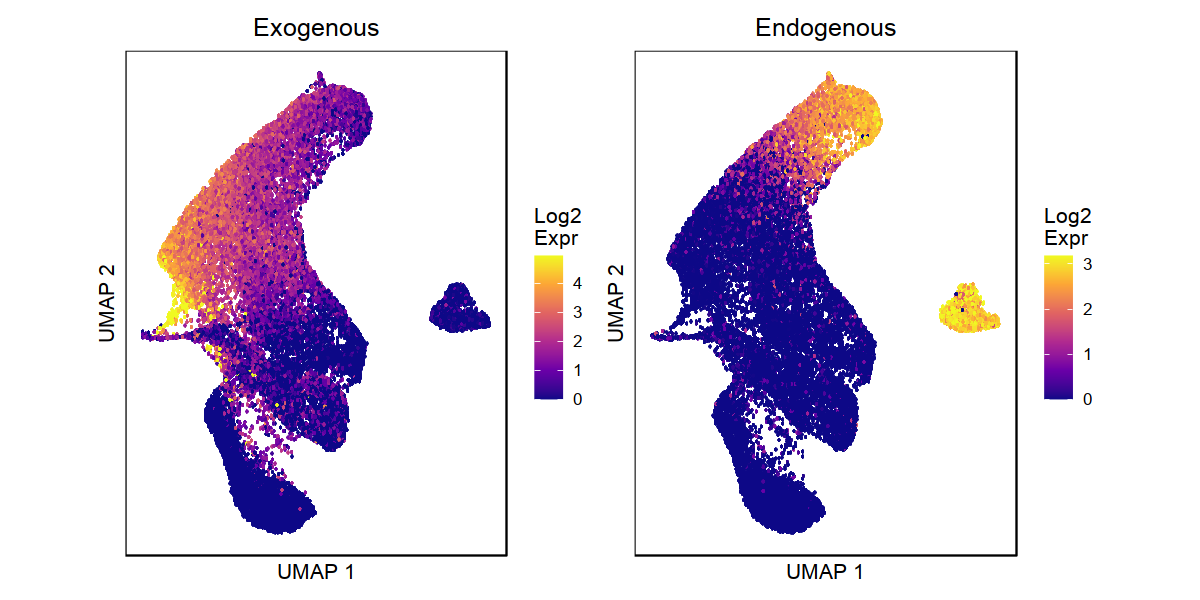

In [31]:
options(repr.plot.width = 10, repr.plot.height = 5)

get_plot(OCT4_exo_norm, title="Exogenous") | get_plot(OCT4_endo_norm, title="Endogenous") 

### SOX2

In [32]:
SOX2_endo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(SOX2_endo_cts) = colnames(rna@assays$RNA@counts)
SOX2_exo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(SOX2_exo_cts) = colnames(rna@assays$RNA@counts)

SOX2_endo_cts[SOX2_bc_endo_exo_counts$bc] = SOX2_bc_endo_exo_counts$endo_cts
SOX2_exo_cts[SOX2_bc_endo_exo_counts$bc] = SOX2_bc_endo_exo_counts$exo_cts

SOX2_endo_norm = log1p(1e4*SOX2_endo_cts/bc_sum)
SOX2_exo_norm = log1p(1e4*SOX2_exo_cts/bc_sum)

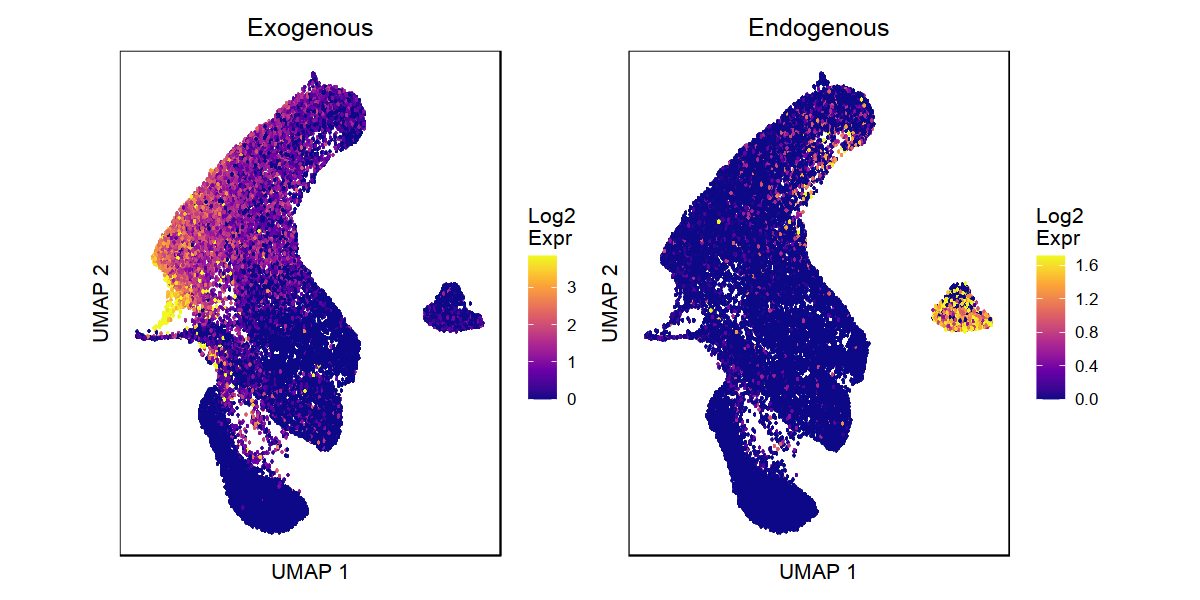

In [33]:
options(repr.plot.width = 10, repr.plot.height = 5)

get_plot(SOX2_exo_norm, title="Exogenous") | get_plot(SOX2_endo_norm, title="Endogenous") 

### KLF4

In [34]:
KLF4_endo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(KLF4_endo_cts) = colnames(rna@assays$RNA@counts)
KLF4_exo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(KLF4_exo_cts) = colnames(rna@assays$RNA@counts)

KLF4_endo_cts[KLF4_bc_endo_exo_counts$bc] = KLF4_bc_endo_exo_counts$endo_cts
KLF4_exo_cts[KLF4_bc_endo_exo_counts$bc] = KLF4_bc_endo_exo_counts$exo_cts

KLF4_endo_norm = log1p(1e4*KLF4_endo_cts/bc_sum)
KLF4_exo_norm = log1p(1e4*KLF4_exo_cts/bc_sum)

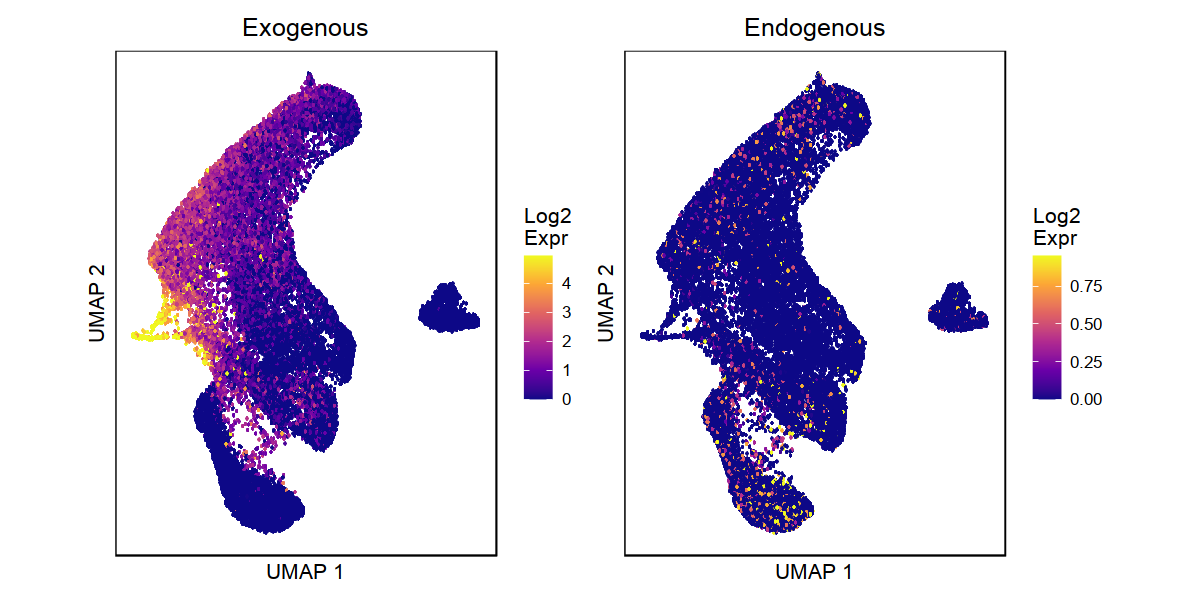

In [35]:
options(repr.plot.width = 10, repr.plot.height = 5)

get_plot(KLF4_exo_norm, title="Exogenous") | get_plot(KLF4_endo_norm, title="Endogenous") 

### MYC

In [36]:
MYC_endo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(MYC_endo_cts) = colnames(rna@assays$RNA@counts)
MYC_exo_cts = rep(0, ncol(rna@assays$RNA@counts))
names(MYC_exo_cts) = colnames(rna@assays$RNA@counts)

MYC_endo_cts[MYC_bc_endo_exo_counts$bc] = MYC_bc_endo_exo_counts$endo_cts
MYC_exo_cts[MYC_bc_endo_exo_counts$bc] = MYC_bc_endo_exo_counts$exo_cts

MYC_endo_norm = log1p(1e4*MYC_endo_cts/bc_sum)
MYC_exo_norm = log1p(1e4*MYC_exo_cts/bc_sum)

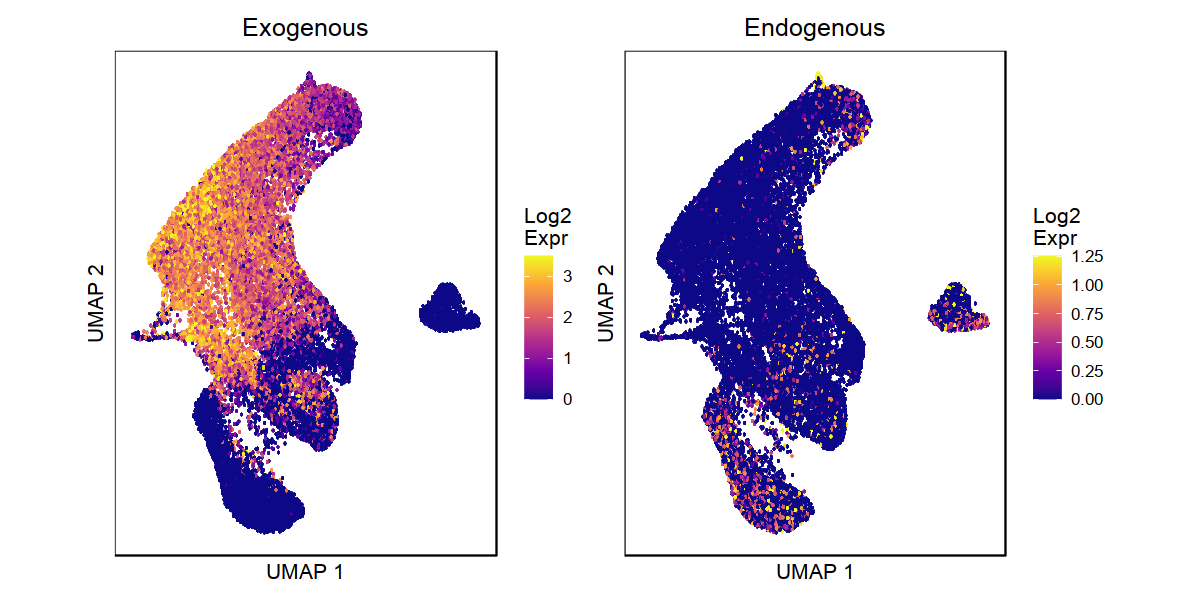

In [37]:
options(repr.plot.width = 10, repr.plot.height = 5)

get_plot(MYC_exo_norm, title="Exogenous") | get_plot(MYC_endo_norm, title="Endogenous") 

## Sanity checks

Check that in most cases total counts after quantification is equal to original count in matrix

Differences arise because filter_10x_bam doesn't filter _exactly_ how cellranger goes from bam -> counts matrix

Good enough for our purpose.

In [45]:
mean(abs(rna@assays$RNA@counts["POU5F1", ] - (OCT4_endo_cts + OCT4_exo_cts)) < 0.01)
mean(abs(rna@assays$RNA@counts["SOX2", ] - (SOX2_endo_cts + SOX2_exo_cts)) < 0.01)
mean(abs(rna@assays$RNA@counts["KLF4", ] - (KLF4_endo_cts + KLF4_exo_cts)) < 0.01)
mean(abs(rna@assays$RNA@counts["MYC", ] - (MYC_endo_cts + MYC_exo_cts)) < 0.01)

[1] 0.999899

[1] 1

[1] 1

[1] 0.9906699

In [75]:
dd = (rna@assays$RNA@counts["MYC", ] - (MYC_endo_cts + MYC_exo_cts))
table(dd[abs(dd)>0.1])


  1   2 
539  15 

Not off by much

In [76]:
dd = (rna@assays$RNA@counts["POU5F1", ] - (OCT4_endo_cts + OCT4_exo_cts))
table(dd[abs(dd)>0.1])


1 
6 

## Write output

In [51]:
out = data.frame(POU5F1_endo_cts=OCT4_endo_cts,
                 POU5F1_endo_norm=OCT4_endo_norm,
                 POU5F1_exo_cts=OCT4_exo_cts,
                 POU5F1_exo_norm=OCT4_exo_norm,
                 
                 SOX2_endo_cts=SOX2_endo_cts,
                 SOX2_endo_norm=SOX2_endo_norm,
                 SOX2_exo_cts=SOX2_exo_cts,
                 SOX2_exo_norm=SOX2_exo_norm,
                 
                 KLF4_endo_cts=KLF4_endo_cts,
                 KLF4_endo_norm=KLF4_endo_norm,
                 KLF4_exo_cts=KLF4_exo_cts,
                 KLF4_exo_norm=KLF4_exo_norm,
                 
                 MYC_endo_cts=MYC_endo_cts,
                 MYC_endo_norm=MYC_endo_norm,
                 MYC_exo_cts=MYC_exo_cts,
                 MYC_exo_norm=MYC_exo_norm)

# order and name of barcodes matches RNA matrix 
stopifnot(all(rownames(out) == colnames(rna)))

tail(out)

,POU5F1_endo_cts,POU5F1_endo_norm,POU5F1_exo_cts,POU5F1_exo_norm,SOX2_endo_cts,SOX2_endo_norm,SOX2_exo_cts,SOX2_exo_norm,KLF4_endo_cts,KLF4_endo_norm,KLF4_exo_cts,KLF4_exo_norm,MYC_endo_cts,MYC_endo_norm,MYC_exo_cts,MYC_exo_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTTGGAGTCTATGTGG-9,26.85807,2.892578,1.419307e-01,8.622002e-02,5.990246,1.568707,9.753566e-03,6.168958e-03,0,0,0,0,2,0.8192839,1.007633e-17,6.392802e-18
TTTGGTTCACATCCCT-9,1.00000,1.734546,2.108506e-39,9.839039e-39,1.000000,1.734546,1.410664e-32,6.582659e-32,0,0,0,0,0,0.0000000,0.000000e+00,0.000000e+00
TTTGGTTGTTGCCTAA-9,26.70591,2.830634,2.940865e-01,1.618726e-01,7.528468,1.704402,4.715322e-01,2.482110e-01,0,0,0,0,2,0.7861626,2.110357e-15,1.260893e-15
TTTGGTTTCTCTTAAC-9,16.00000,3.279988,2.784124e-10,4.450327e-10,4.892258,2.177034,1.077421e-01,1.589011e-01,0,0,0,0,0,0.0000000,0.000000e+00,0.000000e+00
TTTGTTGGTAGTGTGG-9,19.70367,2.925724,2.963256e-01,2.353929e-01,5.000000,1.700791,8.381753e-08,7.507167e-08,0,0,0,0,0,0.0000000,0.000000e+00,0.000000e+00
TTTGTTGTCCGTAGTA-9,51.99980,3.250726,2.048153e-04,9.771247e-05,9.999969,1.752841,3.133009e-05,1.494745e-05,0,0,0,0,1,0.3900802,3.794645e-16,1.810422e-16


In [54]:
write.table(out, "./out/quants.tsv", sep='\t', quote=F)

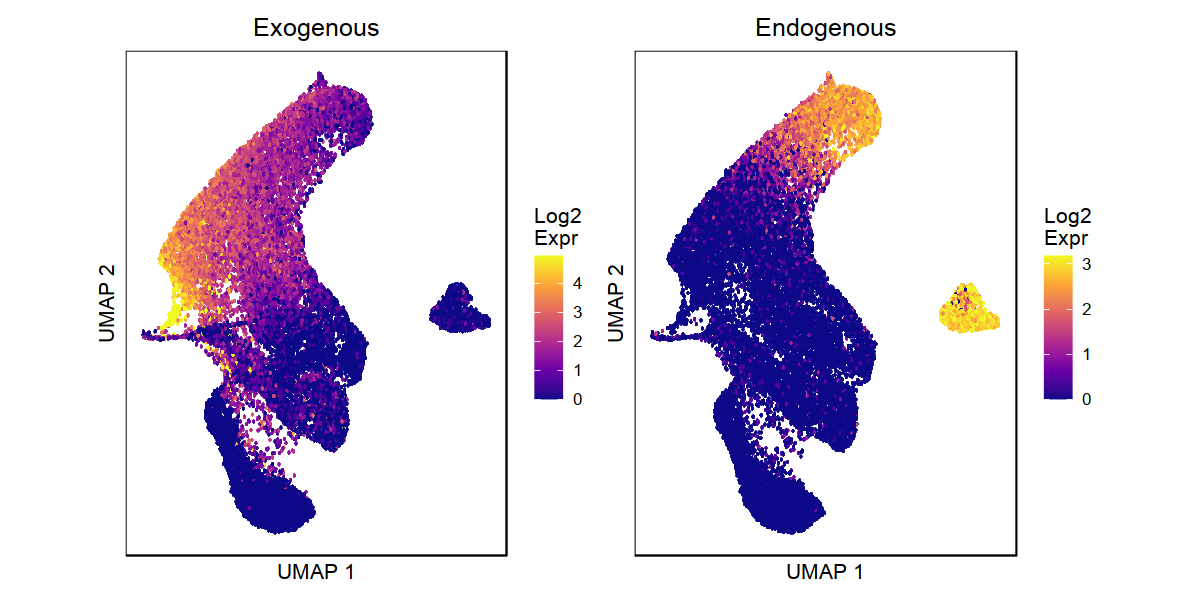

In [57]:
options(repr.plot.width = 10, repr.plot.height = 5)

get_plot(out$POU5F1_exo_norm, title="Exogenous") | get_plot(out$POU5F1_endo_norm, title="Endogenous") 

---

In [56]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scales_1.1.0    scattermore_0.7 patchwork_1.0.0 ggplot2_3.3.3  
[5] Seurat_3.1.5   

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.0         
 [7] sctransform_0.2.1   tools_3.6.3 